## 1. 데이터 전처리 실험
* outlier detection
* missing imputation
* normalization

> 초기 데이터는 `numpy` 를 통해 Random 하게 확보 (이상치를 포함한 형태)

In [66]:
import numpy as np #라이러리를 불러온다.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [67]:
# 결측치만 시각화하는 함수
def plot_missing_data(data):
    missing_mask = np.isnan(data)
    
    plt.figure(figsize=(12, 8))
    
    # 결측치 강조: 빨간색 마커로 표시
    plt.scatter(np.where(missing_mask)[0], np.zeros(np.sum(missing_mask)), color='red', label='Missing Data', s=100, edgecolor='black', alpha=0.8)
    
    plt.title('Missing Data', fontsize=18, weight='bold')
    plt.xlabel('Samples', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()

# 이상치만 시각화하는 함수
def plot_outlier_data(data):
    outlier_mask = (data > 10)  # 이상치는 10을 넘는 값으로 가정
    
    plt.figure(figsize=(12, 8))
    
    # 이상치 강조: 노란색 마커로 표시
    plt.scatter(np.where(outlier_mask)[0], np.zeros(np.sum(outlier_mask)), color='yellow', label='Outliers', s=100, edgecolor='black', alpha=0.8)
    
    plt.title('Outliers', fontsize=18, weight='bold')
    plt.xlabel('Samples', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()

# 일반 데이터만 시각화하는 함수
def plot_regular_data(data):
    plt.figure(figsize=(12, 8))
    
    for i in range(data.shape[1]):  # 각 feature에 대해
        plt.plot(data[:, i], marker='o', markersize=6, alpha=0.6, linewidth=2, color='lightgrey')

    plt.title('Regular Data', fontsize=18, weight='bold')
    plt.xlabel('Samples', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.tight_layout()
    plt.show()


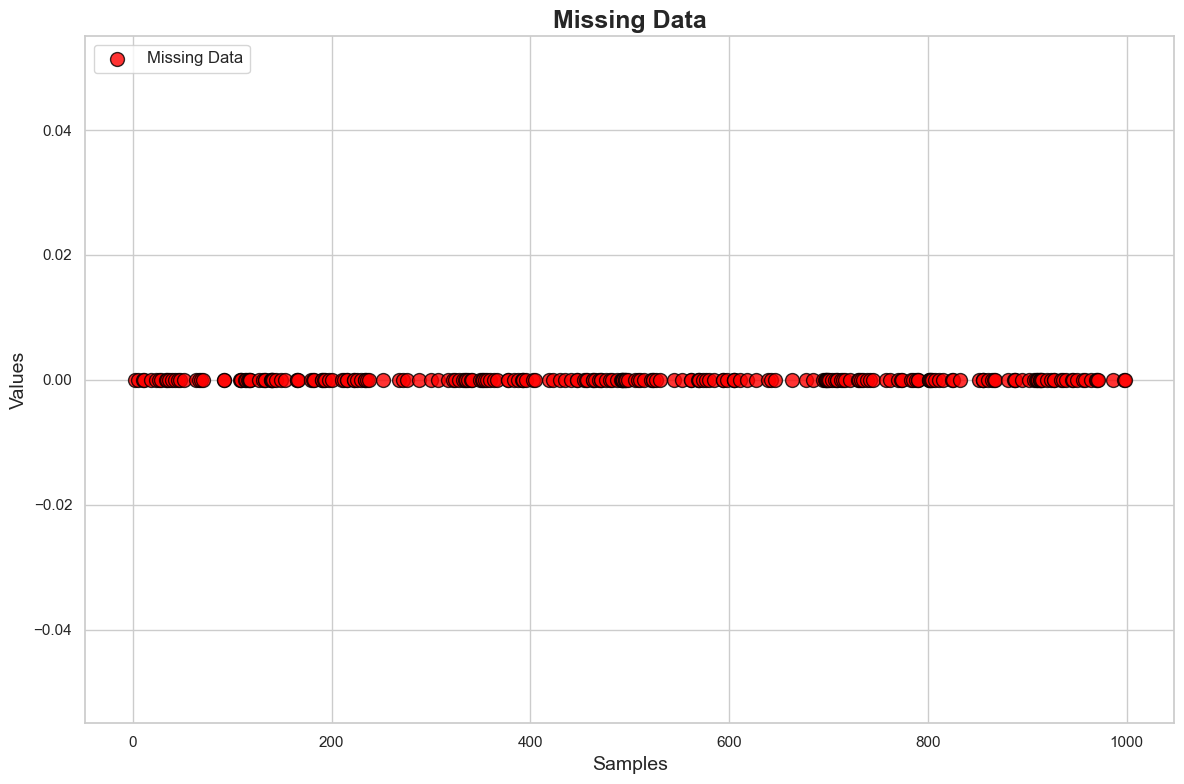

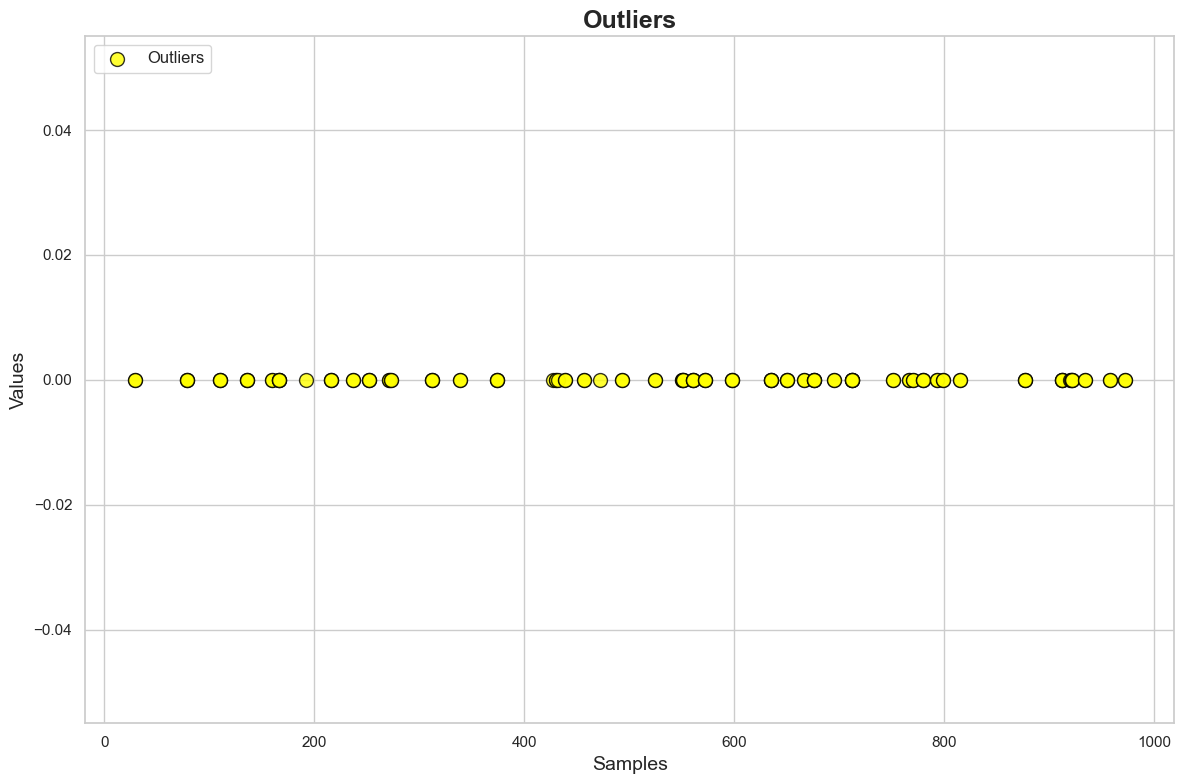

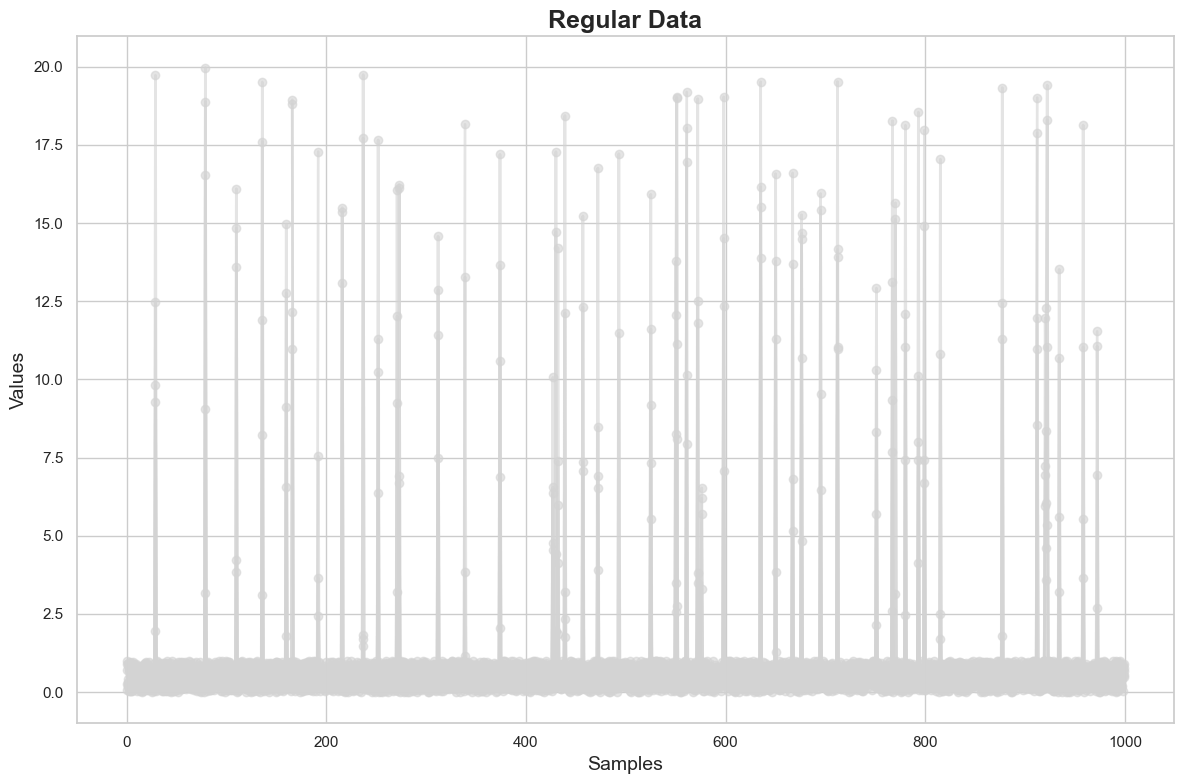

In [68]:
def generate_data(samples=1000, features=5, outlier_ratio=0.05):
    """
    랜덤 데이터 생성 함수입니다. 일부 데이터를 이상치로 설정합니다.
    
    Parameters:
    samples (int): 데이터 샘플 수
    features (int): 특성의 수
    outlier_ratio (float): 이상치 비율 (예: 0.05는 5%)
    
    Returns:
    numpy.ndarray: 랜덤 데이터 (이상치 포함)
    """
    data = np.random.rand(samples, features)
    
    # 이상치 생성: 일부 데이터를 인위적으로 10배로 증가시켜 이상치를 만듭니다.
    num_outliers = int(samples * outlier_ratio)
    outlier_indices = np.random.choice(samples, num_outliers, replace=False)
    data[outlier_indices] *= 20  # 이상치를 생성
    
    # 일부 데이터를 결측치로 설정
    missing_indices = np.random.choice(samples * features, int(samples * features * 0.05), replace=False)
    data = data.flatten()
    data[missing_indices] = np.nan  # 결측치 생성
    data = data.reshape(samples, features)
    
    return data

data = generate_data(samples=1000, features=5, outlier_ratio=0.05)
plot_missing_data(data)  # 결측치만
plot_outlier_data(data)  # 이상치만
plot_regular_data(data)  # 일반 데이터만

In [69]:
print(data)

[[0.88851008 0.24779737 0.98413982 0.06461163 0.71835188]
 [0.2499068  0.1462987  0.88441123 0.3268139  0.40924123]
 [       nan 0.6993729  0.92636216 0.03123841 0.77910507]
 ...
 [0.17992818        nan 0.83380662 0.84215647 0.40856482]
 [0.53225815 0.85144787 0.70043434 0.02020539        nan]
 [0.6588843  0.4897635  0.77030862 0.89858784 0.5458945 ]]


In [70]:
# 1. 결측치 보정 (중앙값으로 대체)
def impute_missing_data(data):
    # 각 열의 중앙값을 사용하여 결측치를 대체
    df = pd.DataFrame(data)
    return df.apply(lambda col: col.fillna(col.median()), axis=0).values

# 2. 이상치 탐지 및 제거 (IQR 방식)
def remove_outliers(data, threshold=1.5):
    # IQR 계산
    Q1 = np.percentile(data, 25, axis=0)
    Q3 = np.percentile(data, 75, axis=0)
    IQR = Q3 - Q1
    # 이상치 범위 설정
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    # 이상치 제거
    return np.clip(data, lower_bound, upper_bound)

# 3-1. 데이터 정규화 (Min-Max Scaling)
def normalize_data(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

# 3-2. 데이터 정규화 (Z-Score Scaling)
def zscore_normalize_data(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

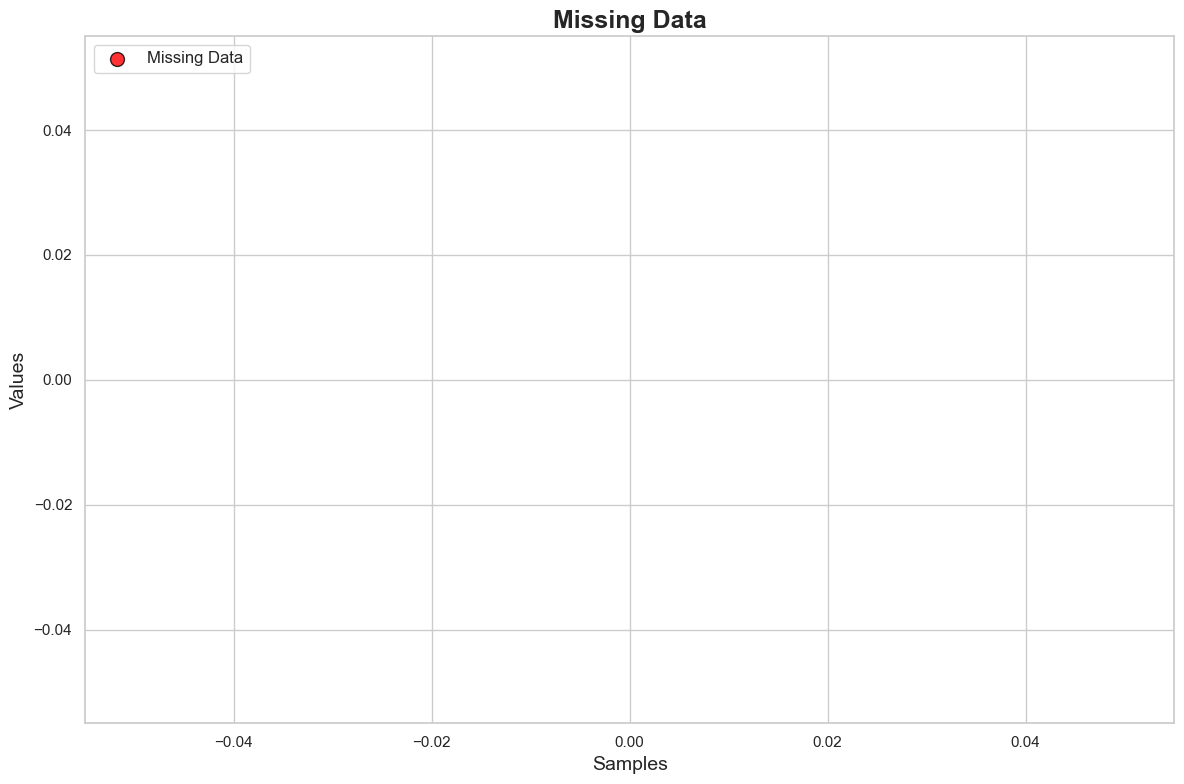

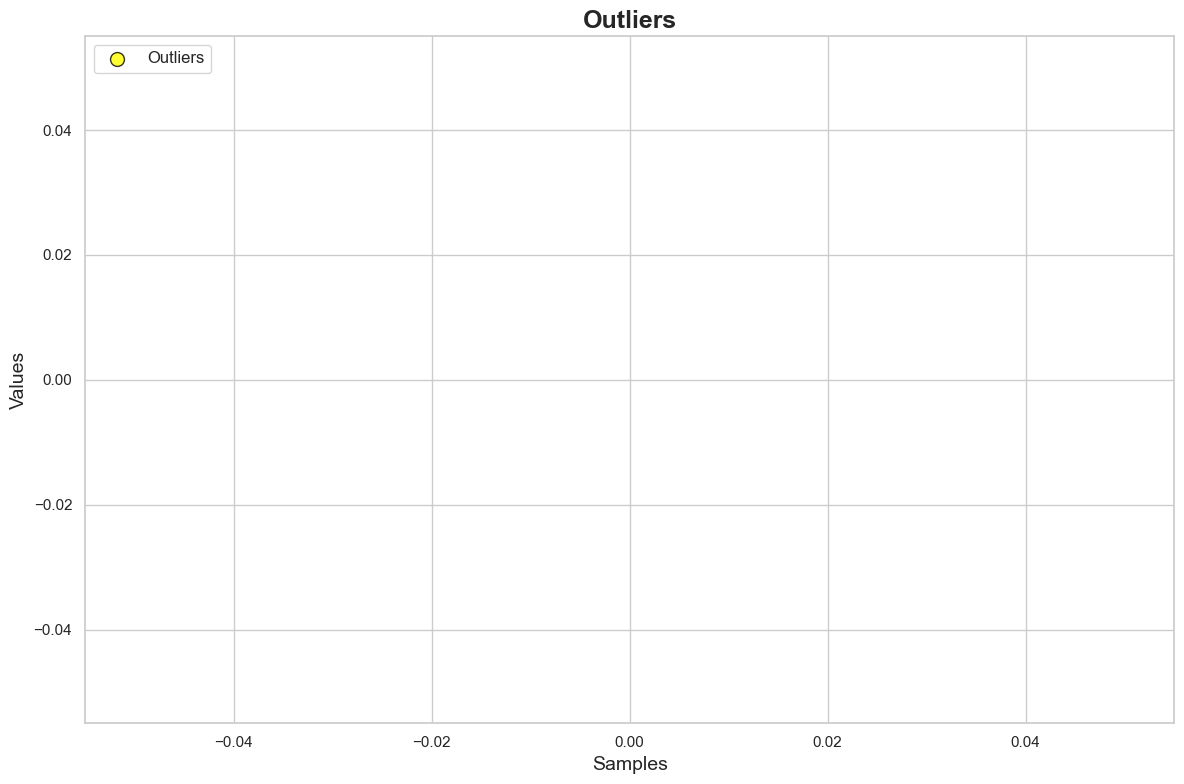

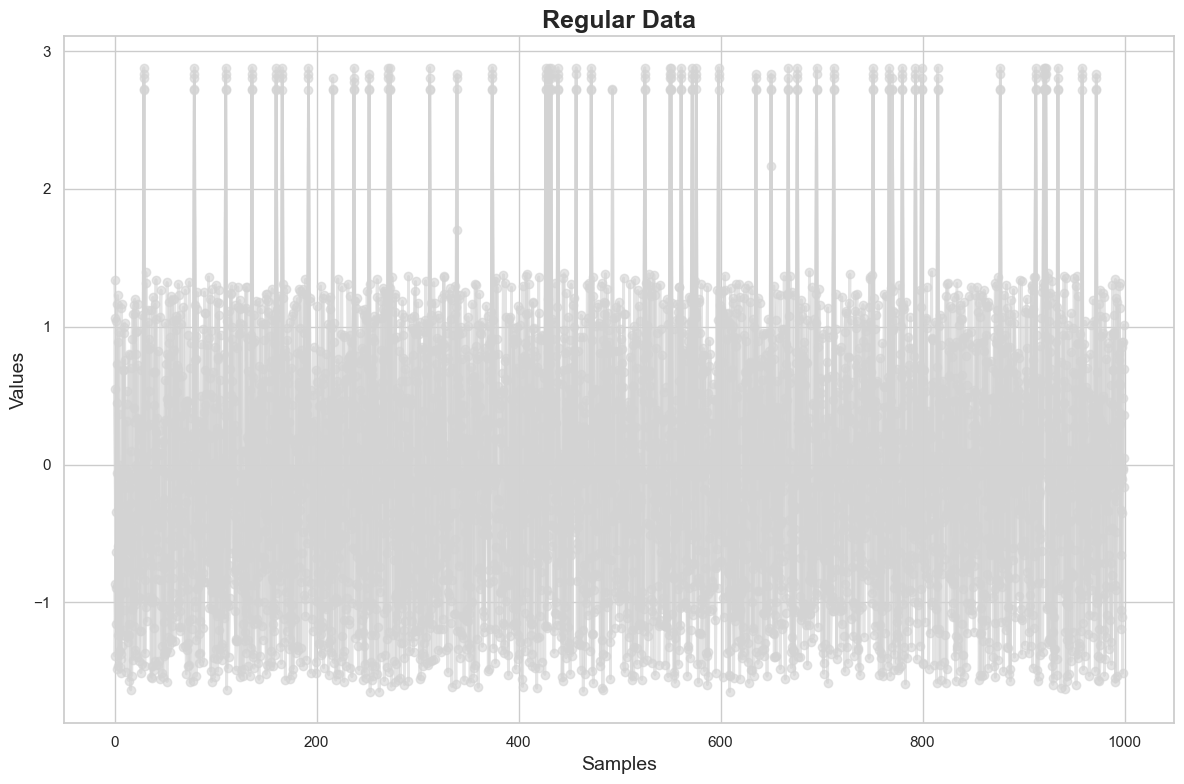

In [ ]:
# 1. 결측치 보정
data_imputed = impute_missing_data(data)

# 2. 이상치 제거
data_no_outliers = remove_outliers(data_imputed)

# 3. 정규화 (Min-Max Scaling)
data_normalized = normalize_data(data_no_outliers)

# 4. Z-Score 정규화
data_zscore_normalized = zscore_normalize_data(data_no_outliers)

plot_missing_data(data_zscore_normalized)
plot_outlier_data(data_zscore_normalized)
plot_regular_data(data_no_outliers)
